In [69]:
import os
from geopandas import GeoDataFrame
from pyproj import Proj, transform
import fiona
from fiona.crs import from_epsg
import shapely
from shapely.geometry import point

import numpy as np
import pandas as pd
from pandas import DataFrame
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import geopandas as gp
import os
import shapely
%matplotlib inline

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5616k  100 5616k    0     0  1243k      0  0:00:04  0:00:04 --:--:-- 1263k


In [3]:
!unzip nycb2010_16d.zip

Archive:  nycb2010_16d.zip
  inflating: nycb2010_16d/nycb2010.shp  
  inflating: nycb2010_16d/nycb2010.dbf  
  inflating: nycb2010_16d/nycb2010.shx  
  inflating: nycb2010_16d/nycb2010.prj  
  inflating: nycb2010_16d/nycb2010.shp.xml  


In [4]:
os.getenv('PUIDATA')

'/home/cusp/lag552/PUIdata'

In [5]:
os.system("mv nycb2010_16d " + os.getenv("PUIDATA"))

0

In [38]:
ct_shape = GeoDataFrame.from_file(os.getenv('PUIDATA') + '/nycb2010_16d/nycb2010.shp')
ct_shape.to_crs(epsg=4326, inplace = True)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374566...
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438017 40.61085506705416...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910642 40.62600632452712...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,POLYGON ((-74.08708799689826 40.61116883123923...
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511992 40.60100160655586...


In [42]:
ct_latlon =ct_shape.loc[ct_shape['BoroName'] == 'Brooklyn']
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365178...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567196...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.6948851429698, ..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [60]:
cusp = shapely.geometry.Point(-73.986405, 40.693452)
print(cusp)

POINT (-73.986405 40.693452)


In [100]:
# SOURCE http://stackoverflow.com/questions/40848809/how-to-find-a-point-within-a-polygon
 
cusp_index = ct_latlon[ct_latlon.geometry.intersects(cusp)].geometry.values[0]
print ('CUSP is contained in', cusp_index)

CUSP is contained in POLYGON ((-73.98619262163143 40.69375351893802, -73.98621117787486 40.69338386010246, -73.98622595691907 40.69308831340506, -73.98725396415627 40.69312490273171, -73.98722751058244 40.69379951950235, -73.98619262163143 40.69375351893802))


In [67]:
# SOURCE: http://stackoverflow.com/questions/25055712/pandas-every-nth-row
ct_tenth = ct_latlon.iloc[::10, :]
ct_tenth.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365178...
5047,30035001000,3,Brooklyn,1000,003500,10469.636350,507.804498,POLYGON ((-73.97551988364876 40.68675683608991...
5057,30054001000,3,Brooklyn,1000,005400,189033.189700,1938.321547,POLYGON ((-74.03649125984288 40.61798915516788...
5067,30067001000,3,Brooklyn,1000,006700,198454.446949,1936.158155,POLYGON ((-73.99440802432692 40.68545249599622...
5077,30084001000,3,Brooklyn,1000,008400,208451.540053,2121.627337,"POLYGON ((-74.00041318188852 40.6546287019162,..."


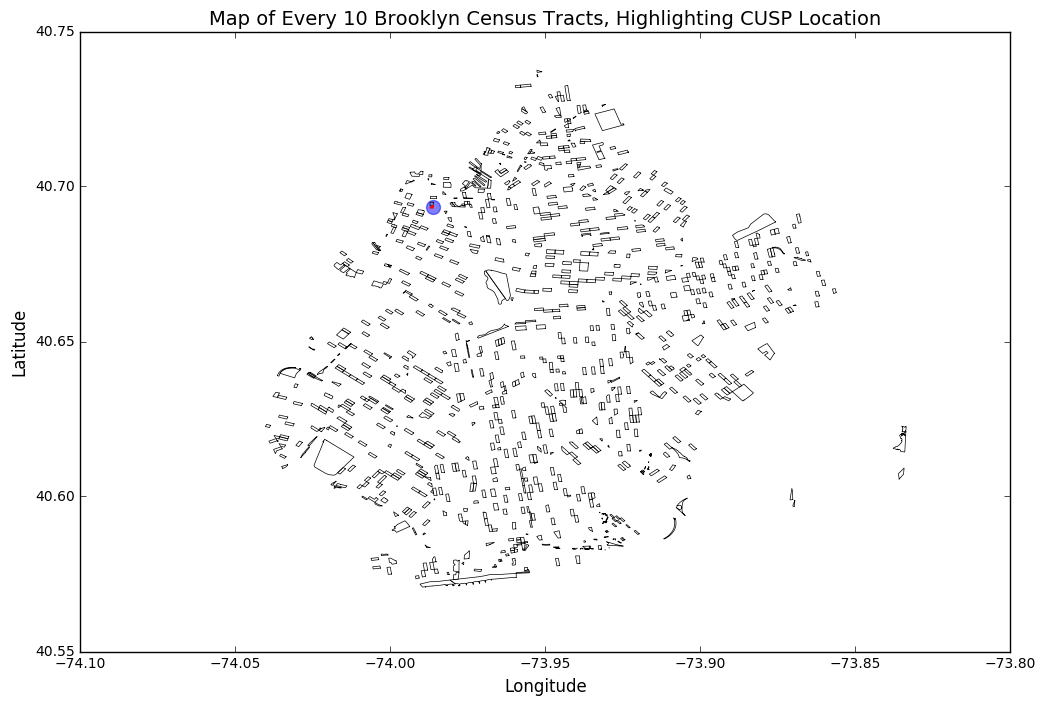

In [113]:
# SOURCE: http://gis.stackexchange.com/questions/131716/plot-shapefile-with-matplotlib

x = [-73.98619262163143, -73.98621117787486, -73.98622595691907, -73.98725396415627, -73.98619262163143] 
y = [40.69375351893802, 40.69338386010246, 40.69308831340506, 40.69312490273171, 40.69375351893802]

ct_tenth.plot(figsize = (12, 8), linewidth = 0.5, alpha = 0.0)
pylab.scatter(cusp.x, cusp.y, color = 'blue', alpha = 0.5, s = 100.0)

plt.plot(x,y, color = 'red')

plt.title('Map of Every 10 Brooklyn Census Tracts, Highlighting CUSP Location', fontsize = 14)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)

## Figure 1: 

### The above figure is a map of every 10 census tracts in Brooklyn, NYC and highlights the location of CUSP in blue. The census tract specifically containing CUSP is in red.